# Actividad 22: Aprendizaje supervisado – Clasificación basada en árboles

En este ejercicio, exploraremos un conjunto de datos que contiene información sobre diferentes características de frutas, como masa, ancho, altura y puntuación de color. Luego, construiremos y evaluaremos varios modelos de clasificación para predecir la etiqueta de la fruta en función de estas características. Utilizaremos Python y las bibliotecas de ciencia de datos, como Pandas, Matplotlib, Seaborn y Scikit-Learn.

## Paso 1: Preparación del entorno

1. Abre Jupyter Notebook o Colab (puedes usar el enlace proporcionado en el código original).
2. Instala las librerías que se usarán.
3. Importa las librerías que se usarán.

In [12]:
# Importar la biblioteca Pandas para el manejo y análisis de datos
import pandas as pd

# Importar la biblioteca Matplotlib para la visualización de datos
import matplotlib.pyplot as plt

# Importar la biblioteca Seaborn para visualizaciones estadísticas y gráficos atractivos
import seaborn as sns

# Importar la biblioteca PyLab de Matplotlib para funciones matemáticas y gráficos adicionales
import pylab as pl

# Importar el módulo scatter_matrix de Pandas para crear matrices de dispersión
from pandas.plotting import scatter_matrix

# Importar el módulo cm (colormap) de Matplotlib para asignar colores a gráficos
from matplotlib import cm

# Importar la función train_test_split de scikit-learn para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importar la clase MinMaxScaler de scikit-learn para escalar características a un rango específico
from sklearn.preprocessing import MinMaxScaler

import numpy as np

from sklearn.tree import DecisionTreeClassifier


## Paso 2: Importar datos

Importar el archivo `21.-fruit_data_with_colors.txt`. Este archivo contiene datos detallados sobre diferentes tipos de frutas. Cada fila del archivo representa una fruta específica y proporciona información relevante sobre sus características. Las columnas presentes en el archivo son las siguientes:

- `fruit_label`: Este atributo numérico representa la etiqueta asignada a cada fruta. Cada etiqueta se refiere a un tipo de fruta en particular. Las etiquetas permiten la clasificación y el análisis de las frutas según sus características.

- `fruit_name`: Esta columna contiene el nombre común de la fruta. Proporciona una identificación legible por humanos de la fruta a la que hace referencia.

- `fruit_subtype`: Aquí se especifica el subtipo o variedad específica de la fruta. Esta columna proporciona información adicional sobre la clasificación detallada de las frutas según ciertos criterios.

- `mass`: Indica la masa de la fruta en alguna unidad de medida. La masa es una característica importante que influye en la identificación y clasificación de la fruta.

- `width`: Representa el ancho de la fruta en una unidad de medida. El ancho es otra dimensión clave que contribuye a las características distintivas de la fruta.

- `height`: Este atributo refleja la altura de la fruta en una unidad de medida. La altura es una característica relevante para diferenciar entre diferentes tipos de frutas.

- `color_score`: Proporciona una puntuación numérica que evalúa el color de la fruta. Esta puntuación puede estar relacionada con la madurez y calidad de la fruta.

Estos datos permiten realizar análisis estadísticos, visualizaciones y modelado de clasificación para comprender mejor las relaciones entre las características de las frutas y sus etiquetas. El archivo CSV es una fuente valiosa para estudios de ciencia de datos y aplicaciones relacionadas con la clasificación y el análisis de frutas.

In [13]:
# Ruta al archivo de datos
ruta_archivo = 'fruit_data_with_colors.txt'

# Cargar el archivo en un DataFrame
fruits = pd.read_table(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(fruits.head())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


## Paso 3: Análisis Exploratorio de Datos

Después de cargar el conjunto de datos, observa las primeras filas utilizando `fruits.head()`.
- Imprime la forma del conjunto de datos con `print(fruits.shape)``.
- Muestra los nombres únicos de las frutas con `print(fruits['fruit_name'].unique())`.
- Visualiza la distribución de las etiquetas de frutas con un gráfico de barras utilizando `sns.countplot(fruits['fruit_name'], label="Count")`.
- Crea histogramas y diagramas de caja para explorar la distribución y las relaciones entre las características numéricas.

(59, 7)
['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


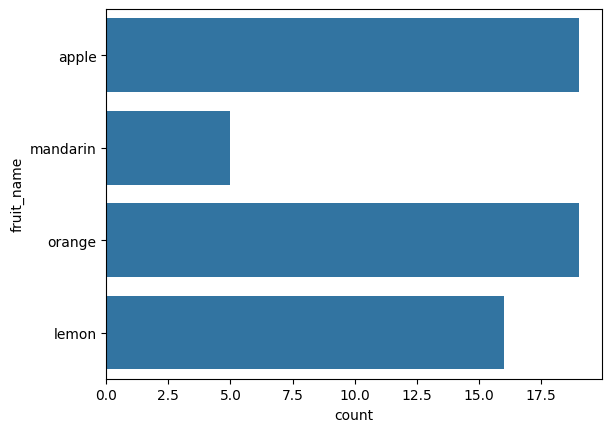

In [14]:
print(fruits.shape)
print(fruits['fruit_name'].unique())
print(fruits.groupby('fruit_name').size())
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

### Visualización

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables.

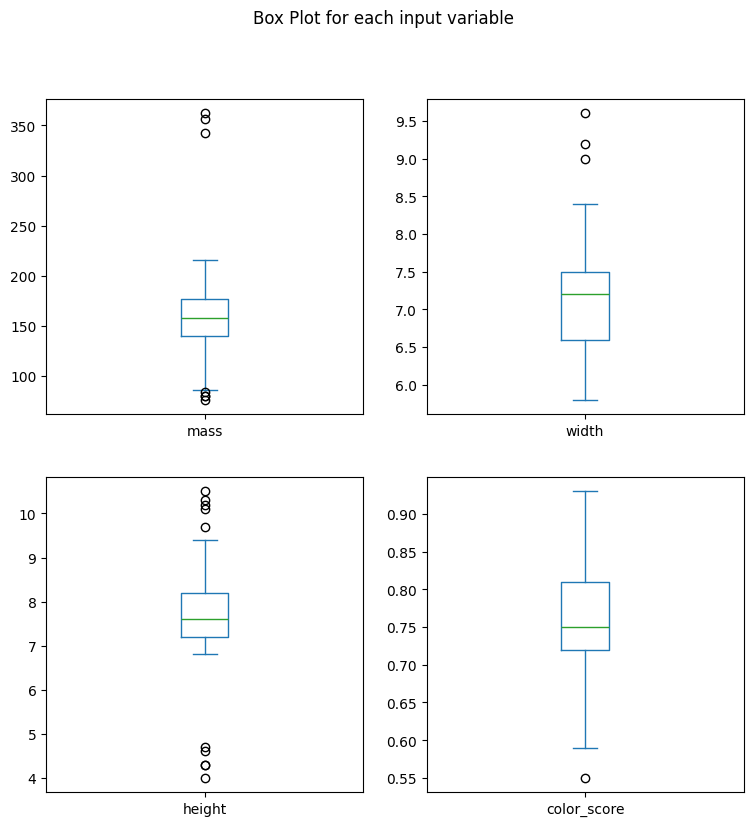

In [15]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

It looks like perhaps color score has a near Gaussian distribution

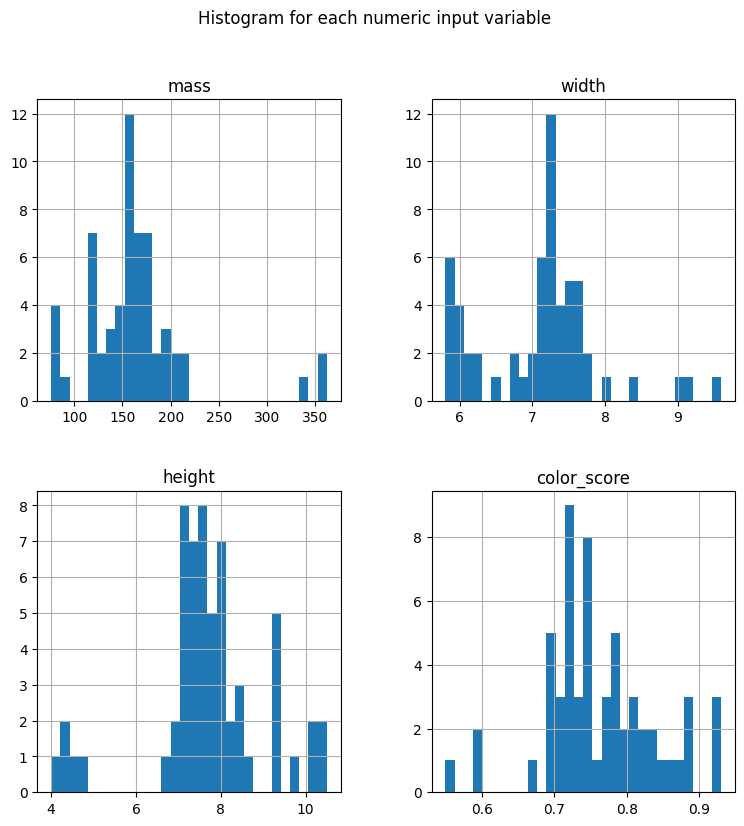

In [16]:
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship

/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_26081/1926851591.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


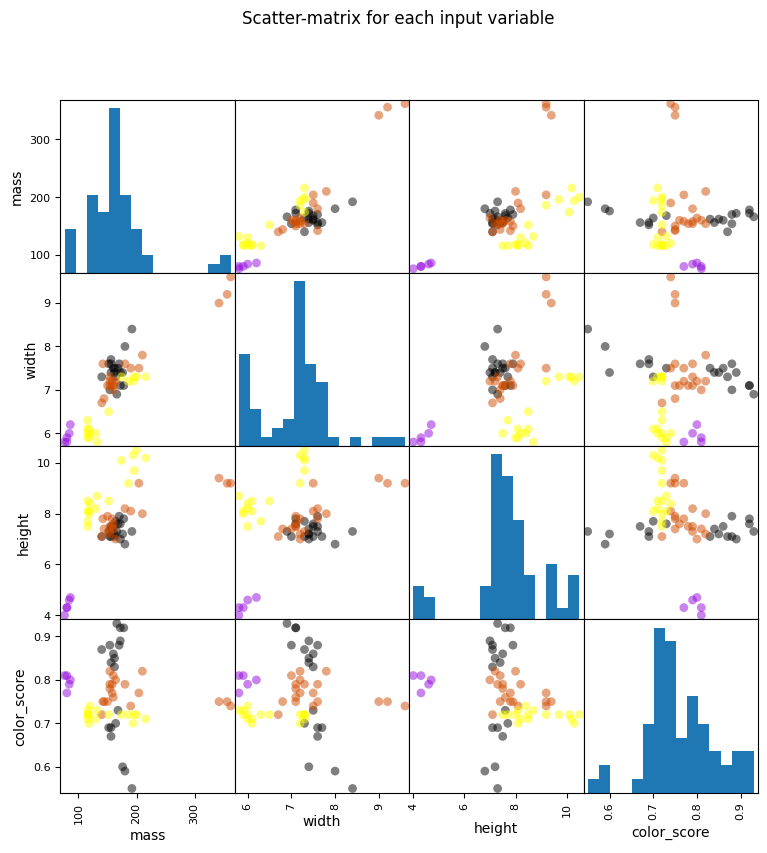

In [17]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

### Resumen estadístico de los datos

In [18]:
df_fruits = pd.DataFrame(fruits)
df_fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


## Paso 4: Preprocesamiento de Datos

1. Divide los datos en conjuntos de entrenamiento y prueba usando `train_test_split`.
2. Aplica una escala Min-Max a las características utilizando `MinMaxScaler` en los conjuntos de entrenamiento y prueba.

Crea conjuntos de entrenamiento y prueba y aplica escalado.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Paso 5: Construcción y Evaluación de Modelos

1. Construye y evalúa un modelo de Árbol de Decisión

### Decision Tree

In [20]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


2. Construye y evalúa un modelo de Bosque Aleatorio (Random Forest)

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.87


## Paso 6: Interpretación de Resultados

1. Compara y contrasta las precisiones de los tres modelos en los conjuntos de entrenamiento y prueba.
2. Discute las diferencias entre los modelos y su capacidad para predecir las etiquetas de frutas.
3. Reflexiona sobre la idoneidad de cada modelo para este conjunto de datos y cómo podrían mejorarse los resultados.

## Paso 7: Mejoras y Experimentación (Opcional)

1. Experimenta con diferentes parámetros para los modelos de clasificación y observa cómo afectan las precisiones.
2. Intenta otros modelos de clasificación disponibles en Scikit-Learn y compara sus resultados.
3. Realiza visualizaciones adicionales para comprender mejor las relaciones entre características y etiquetas de frutas.

## Conclusiones

Este ejercicio te brindará experiencia práctica en el análisis exploratorio de datos, la preparación de datos y la construcción y evaluación de modelos de clasificación en el contexto de la ciencia de datos. ¡Diviértete explorando y experimentando con los datos!